In [1]:
from fytok.Tokamak import Tokamak
from spdm.view import View as sp_view

2023-10-10 19:56:03,985 [   fytok]     INFO: 
#######################################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/      
Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences) 
URL         : https://gitee.com/openfusion/fytok_tutorial

version = 0.0.0
#######################################################################################################################

2023-10-10 19:56:04,018 [   fytok]     INFO: Mapping path [PosixPath('/home/salmon/workspace/fytok/python/fytok/_mapping')]
2023-10-10 19:56:04,197 [   fytok]     INFO: FyTok (0.2.0-168-g7ca2b7d-dirty) is compatible with the IMAS data dictionary 3.38.1-dirty.


In [2]:
tok = Tokamak("file+geqdsk://./data/g900003.00230_ITER_15MA_eqdsk16HR.txt",
              device='ITER', shot='900003', time=2.3)

2023-10-10 19:56:04,300 [    spdm]     INFO: Load module spdm.plugins.data.plugin_xml


2023-10-10 19:56:04,316 [    spdm]     INFO: Load module spdm.view.view_matplotlib
2023-10-10 19:56:04,342 [    spdm]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2023-10-10 19:56:04,344 [    spdm]    DEBUG: /home/salmon/workspace/fytok_tutorial/../fytok/python/spdm/plugins/data/plugin_geqdsk.py:436:__init__: Open File mode=Mode.read  URITuple(protocol='file+geqdsk', authority='', path='./data/g900003.00230_ITER_15MA_eqdsk16HR.txt', query={'shot': '900003', 'run': '', 'uid': '900003'}, fragment='') 
2023-10-10 19:56:04,470 [   fytok]     INFO: Load module Wall 
2023-10-10 19:56:04,475 [   fytok]     INFO: Load module TF 
2023-10-10 19:56:04,478 [   fytok]     INFO: Load module PFActive 
2023-10-10 19:56:04,496 [   fytok]     INFO: 
###############################################################################
Load module Magnetics  version=None
Magnetic diagnostics for equilibrium identification and plasma shape control.
    
##################################################

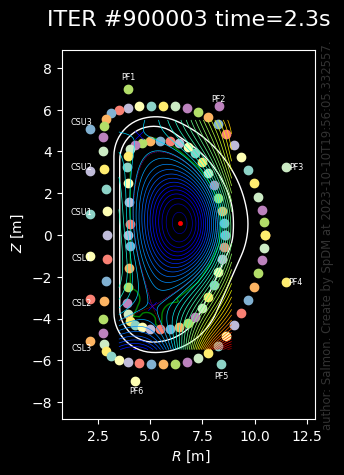

In [3]:
fig1=sp_view.display(tok,title=tok.short_description,)

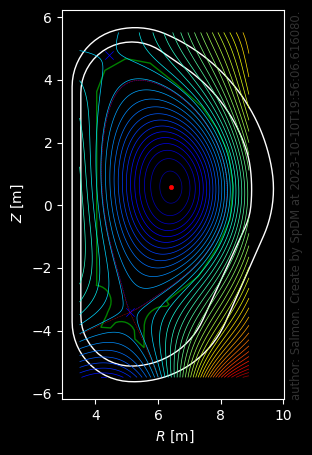

In [4]:
fig=sp_view.display([tok.equilibrium,tok.wall])

/home/salmon/workspace/fytok_tutorial/../fytok/SpDB/python/spdm/data/Functor.py:81: RuntimeWarning: invalid value encountered in sqrt
  value = op(*args, **kwargs)


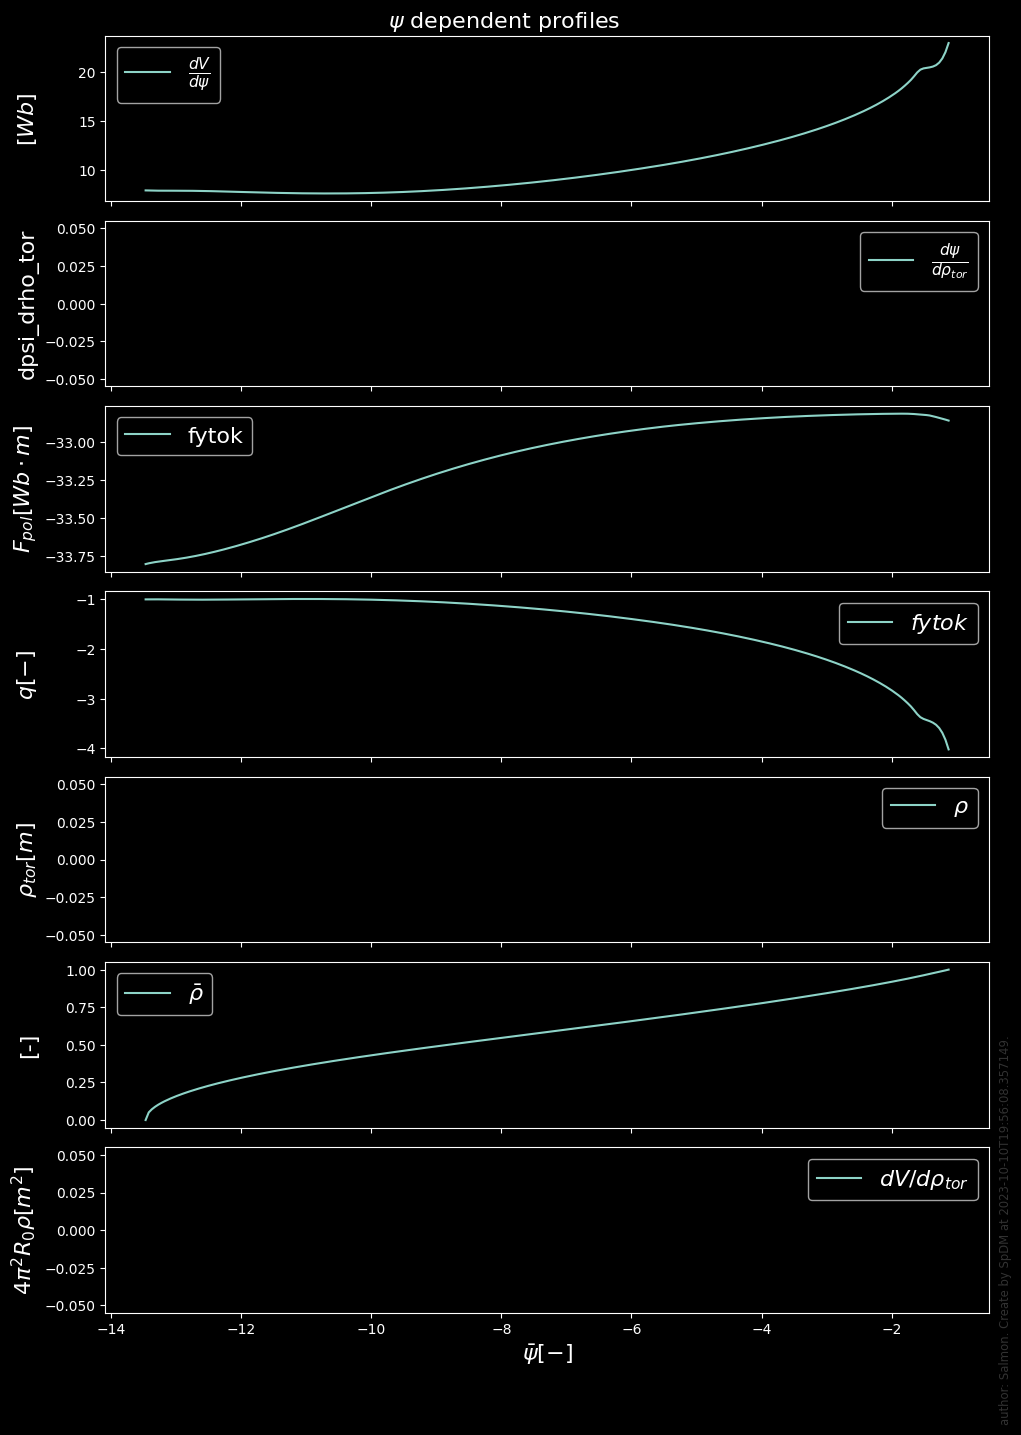

In [5]:
eq_profiles_1d = tok.equilibrium.time_slice.current.profiles_1d

profs = sp_view.plot([
    ((eq_profiles_1d.dvolume_dpsi, {"label": r"$\frac{dV}{d\psi}$"}), {"y_label": r"$[Wb]$"}),

    (eq_profiles_1d.dpsi_drho_tor, {"label": r"$\frac{d\psi}{d\rho_{tor}}$"}),
    
    ([
        # (bs_eq_fpol,  {"label": "astra", **bs_line_style}),
        (eq_profiles_1d.f,  {"label": r"fytok"}),
    ], {"y_label": r"$F_{pol} [Wb\cdot m]$"}),
    ([
        # (function_like(profiles["q"].values, bs_psi), {"label": r"astra", **bs_line_style}),
        (eq_profiles_1d.q,  {"label": r"$fytok$"}),
    ], {"y_label": r"$q [-]$"}),
    ([
        # (function_like(profiles["rho"].values, bs_psi), {"label": r"astra", **bs_line_style}),
        (eq_profiles_1d.rho_tor,   {"label": r"$\rho$"}),
    ], {"y_label":  r"$\rho_{tor}[m]$", }),

    ([
        # (function_like(profiles["x"].values, bs_psi), {
        #     "label": r"$\frac{\rho_{tor}}{\rho_{tor,bdry}}$ astra", **bs_line_style}),
        (eq_profiles_1d.rho_tor_norm,   {"label": r"$\bar{\rho}$"}),
    ], {"y_label":  r"[-]", }),

    ([
        # (function_like(4*(scipy.constants.pi**2) * R0 * profiles["rho"].values, bs_psi),
        #  {"label": r"$4\pi^2 R_0 \rho$", **bs_line_style}),
        (eq_profiles_1d.dvolume_drho_tor,  {"label": r"$dV/d\rho_{tor}$", }),
    ], {"y_label":  r"$4\pi ^ 2 R_0 \rho[m ^ 2]$"}),
],
    x_axis=tok.equilibrium.time_slice.current.profiles_1d.psi,
    # x_value=tok.equilibrium.time_slice.current.profiles_1d.psi_norm,
    x_label=r"$\bar{\psi}[-]$",
    title=r"$\psi$ dependent profiles",
)


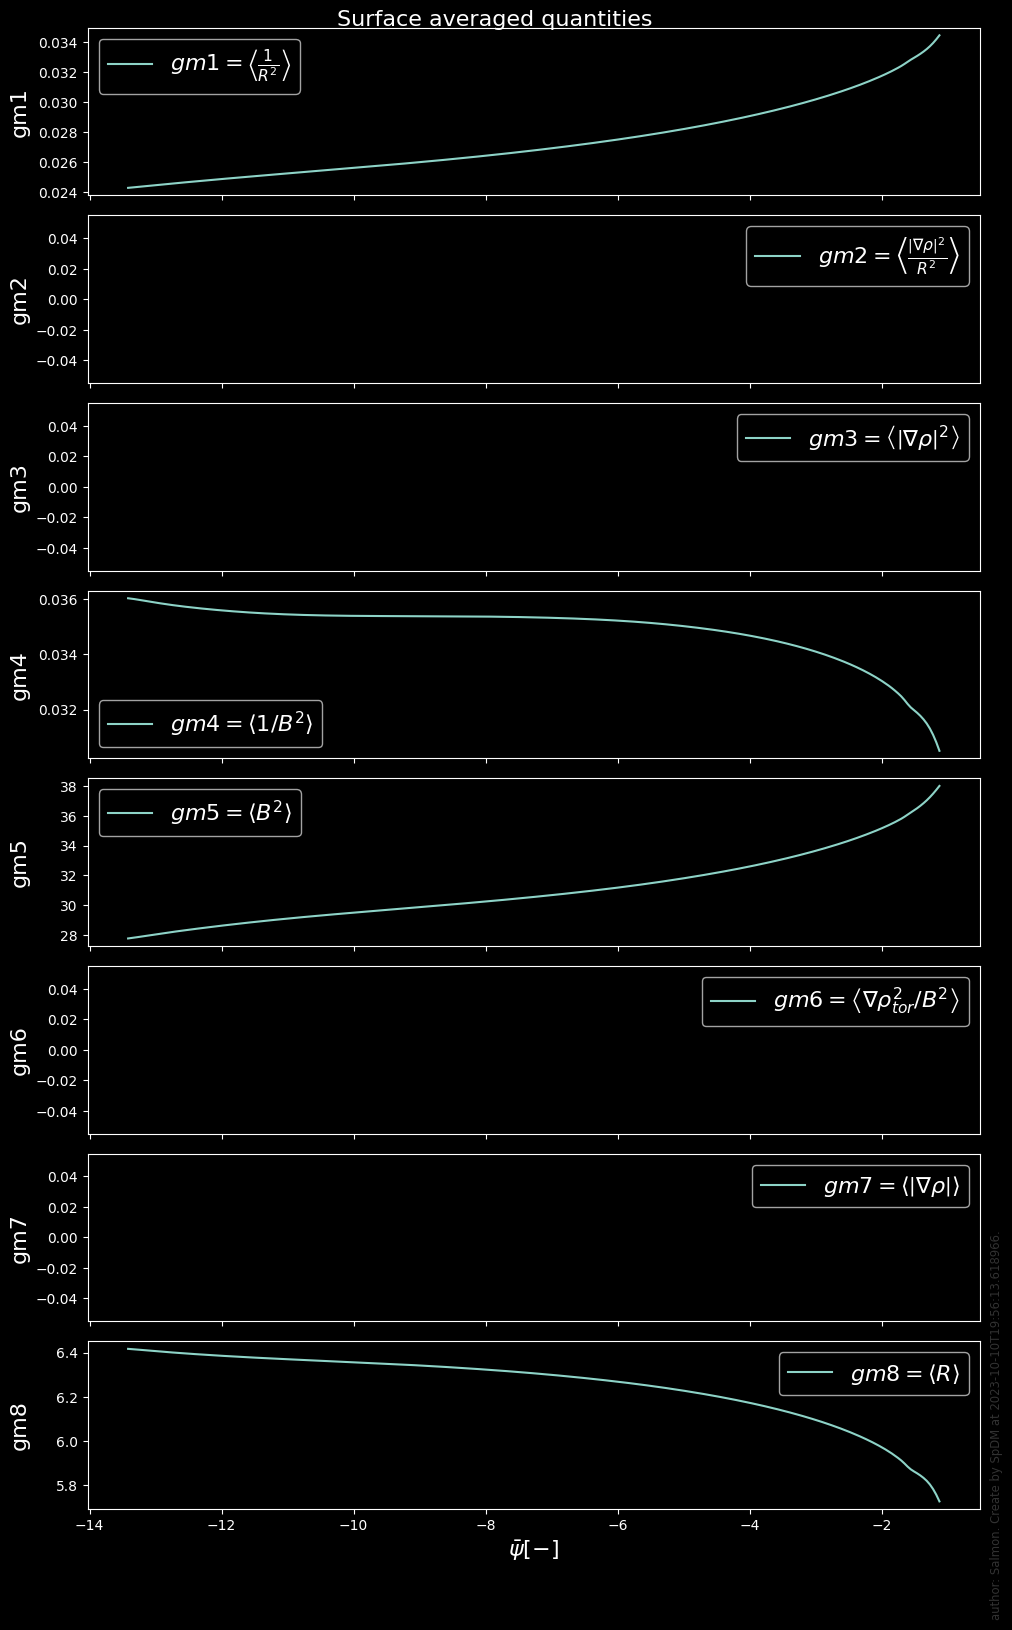

In [6]:
surfs = sp_view.plot([
   
    (eq_profiles_1d.gm1,   {"label": r"$gm1=\left<\frac{1}{R^2}\right>$"}),
    (eq_profiles_1d.gm2,   {"label": r"$gm2=\left<\frac{\left|\nabla \rho\right|^2}{R^2}\right>$"}),
    (eq_profiles_1d.gm3,   {"label": r"$gm3=\left<\left|\nabla \rho\right|^2\right>$"}),
    (eq_profiles_1d.gm4,   {"label": r"$gm4=\left<1/B^2\right>$"}),
    (eq_profiles_1d.gm5,   {"label": r"$gm5=\left<B^2\right>$"}),
    (eq_profiles_1d.gm6,   {"label": r"$gm6=\left<\nabla \rho_{tor}^2/ B^2 \right>$"}),
    (eq_profiles_1d.gm7,   {"label": r"$gm7=\left<\left|\nabla \rho\right|\right>$"}),
    (eq_profiles_1d.gm8,   {"label": r"$gm8=\left<R\right>$"}),

],
    x_axis=tok.equilibrium.time_slice.current.profiles_1d.psi[1:],
    # x_value=tok.equilibrium.time_slice.current.profiles_1d.psi_norm[1:],
    x_label=r"$\bar{\psi}[-]$",
    title=r"Surface averaged quantities",
)